In [3]:
%matplotlib inline

import numpy as np
import math
import cv2
from matplotlib import pyplot as plt


# Задание 1
Выбрать изображение не менее 1000х800 пикселей (px).

In [4]:
belyash = cv2.imread('/home/qwe/Desktop/анализ изображений/smallbelyash.jpg')

In [5]:
def print_img(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

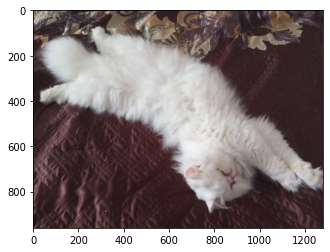

In [6]:
print_img(belyash)

# Задание 2
Применить к изображению самостоятельно придуманные Евклидовы преобразования для смещения, вращения изображения.

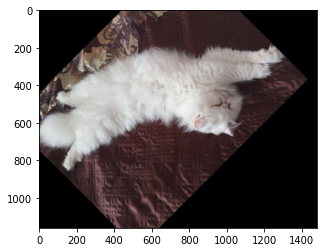

In [5]:
(h, w) = belyash.shape[:2]
center = (w / 2, h / 2)
phi = math.pi/4
# повернем изображение на 45 градусов
M = cv2.getRotationMatrix2D(center, 45, 1.0)
#M = np.float32([[math.cos(phi), -math.sin(phi),0],[math.sin(phi),math.cos(phi),0]])
rotated = cv2.warpAffine(belyash, M, (w+200, h+200))
print_img(rotated);

[[ 7.07106781e-01  7.07106781e-01 -5.19595949e+01]
 [-7.07106781e-01  7.07106781e-01  7.93137085e+02]]


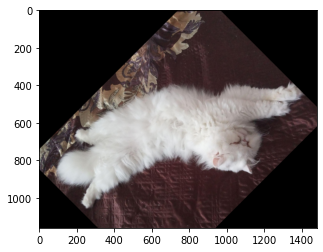

In [6]:
#матрица сдвига
translation_matrix = np.float32([[0,0,100], [0,0,200]])
#объединяем преобразования
translation_matrix = M + translation_matrix;
print(translation_matrix)
img_translation = cv2.warpAffine(belyash, translation_matrix,(w+200,h+200))
print_img(img_translation)

# Задание 3
     В каждом пункте ниже произвести не менее двух преобразований:
    • Изменить форму изображения произвольным аффинным (не Евклидовым) преобразованием.
    • Изменить форму изображения произвольным проективным преобразованием.
    • Применить деформацию (image warping) к изображению.

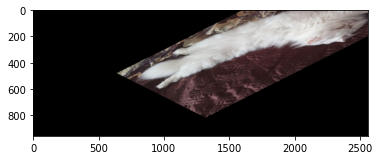

In [13]:
#поворот + перенос + масштабирование
a = 2;
b = 0.5;
phi = -math.pi/4
translation_matrix = np.float32([[a*math.cos(phi),-math.sin(phi),w/2], [math.sin(phi),b*math.cos(phi),h/2]])
img_translation = cv2.warpAffine(belyash, translation_matrix,(2*w,h))
print_img(img_translation)

[[  1.   0.   0.]
 [  0.  -1. 960.]]


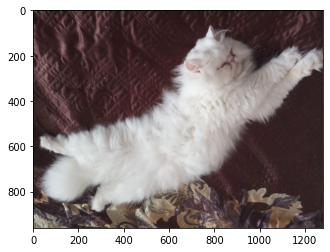

In [93]:
#отражение координат 
#flip_image = cv2.flip(belyash,1)
a = 1;
b = -1;
phi = math.pi/4
translation_matrix = np.float32([[1,0, 0],[0,-1,h]])
print(translation_matrix)
img_translation = cv2.warpAffine(belyash, translation_matrix,(w,h))
print_img(img_translation)

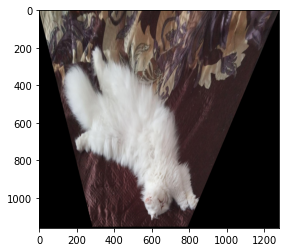

In [99]:
#проективные преобразования
src_points = np.float32([[0,0], [h-1,0], [0,w-1], [h-1,w-1]])
dst_points = np.float32([[0,0], [h-1,0], [int(0.33*h),w-1],
[int(0.66*h),w-1]])
projective_matrix = cv2.getPerspectiveTransform(src_points,dst_points)
img_output = cv2.warpPerspective(belyash, projective_matrix, (w,h+200))
print_img(img_output)

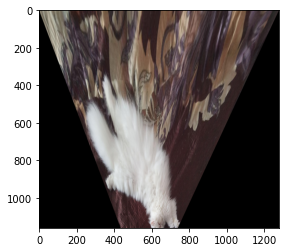

In [100]:
src_points = np.float32([[0,0], [h-1,0], [0,w-1], [h-1,w-1]])
dst_points = np.float32([[0,0], [h-1,0], [int(0.5*h),w-1],
[int(0.66*h),w-1]])
projective_matrix = cv2.getPerspectiveTransform(src_points,dst_points)
img_output = cv2.warpPerspective(belyash, projective_matrix, (w,h+200))
print_img(img_output)

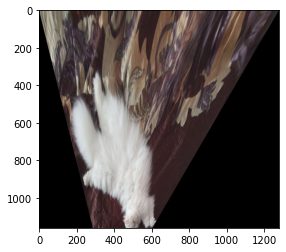

In [101]:
src_points = np.float32([[0,0], [h-1,0], [0,w-1], [h-1,w-1]])
dst_points = np.float32([[0,0], [h-1,0], [int(0.33*h),w-1],
[int(0.5*h),w-1]])
projective_matrix = cv2.getPerspectiveTransform(src_points,dst_points)
img_output = cv2.warpPerspective(belyash, projective_matrix, (w,h+200))
print_img(img_output)

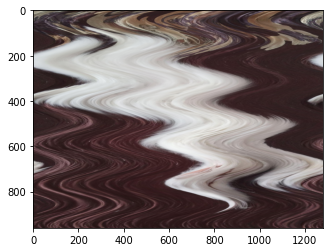

In [116]:
# Деформации изображения
rows, cols = belyash.shape[:2]

img_output = np.zeros(belyash.shape, dtype=belyash.dtype)
for i in range(rows):
    for j in range(cols):
        offset_x = int(100.0*math.sin(2*3.14*i/180))
        offset_y = 0
      #  if j+offset_x < rows:
        img_output[i,j] = belyash[i,(j+offset_x)%cols]
       # else:
        #    img_output[i,j] = 0
print_img(img_output)

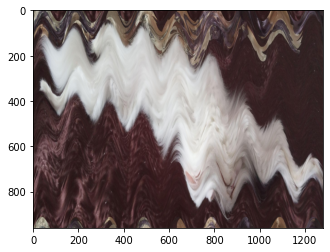

In [121]:
img_output = np.zeros(belyash.shape, dtype=belyash.dtype)
for i in range(rows):
    for j in range(cols):
        offset_x = 0
        offset_y = int(50.0*math.sin(2*3.14*j/150))
     #   if i+offset_y < rows:
        img_output[i,j] = belyash[(i+offset_y)%rows,j]
      #  else:
       #     img_output[i,j] = 0
print_img(img_output)

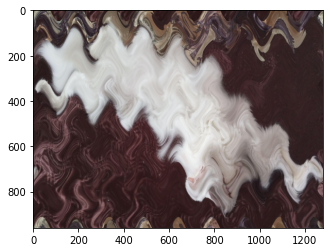

In [123]:
img_output = np.zeros(belyash.shape, dtype=belyash.dtype)
for i in range(rows):
    for j in range(cols):
        offset_x = int(25.0*math.sin(2*3.14*i/150))
        offset_y = int(50.0*math.sin(2*3.14*j/150))
     #   if i+offset_y < rows:
        img_output[i,j] = belyash[(i+offset_y)%rows,(j+offset_x)% cols]
      #  else:
       #     img_output[i,j] = 0
print_img(img_output)

# Задание 4
Исходное изображение условно разделить на четыре одинаковых части. В одной части обнулить любой из цветовых каналов (B, G, R). Вторую часть перевернуть (развернуть на 180 град). Цветовые каналы пикселей третьей части должны содержать сумму цветовых каналов пикселей третьей и четвертой частей изображения. На четвертую часть вставить прямоугольные фрагменты из трех предыдущих частей, не менее одного фрагмента из каждой части. Полученное изображение поместить в самостоятельно выбранную рамку.

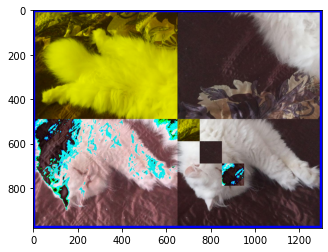

In [40]:
scary_belyash = belyash.copy()
smw = w//2
smh = h//2
lu_belyash = scary_belyash[0:(h//2),0:(w//2),:]
ru_belyash =  scary_belyash[0:(h//2),(w//2):(w)]
lb_belyash = scary_belyash[(h//2):h,0:(w//2),:]
rb_belyash = scary_belyash[(h//2):((h)),(w//2):(w)]
lu_belyash[0:smh,0:smw,0] =0;
M =  np.float32([[math.cos(math.pi),-math.sin(math.pi),smw], [math.sin(math.pi),math.cos(math.pi),smh]])
ru_belyash[:] = cv2.warpAffine(ru_belyash, M, (w//2, h//2))
lb_belyash[:] = lb_belyash[:] + rb_belyash[:] 
rb_belyash[0:100,0:100] = lu_belyash[0:100,0:100]
rb_belyash[100:200,100:200] = ru_belyash[0:100,0:100]
rb_belyash[200:300,200:300] = lb_belyash[0:100,0:100]
BLUE = [255, 0, 0] 
scary_belyash = cv2.copyMakeBorder(scary_belyash,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)
print_img(scary_belyash)

# Задание 5
Используя хотя бы раз каждую из функций rectangle, polylines, circle, ellipse, putText, нарисовать и подписать какое-либо животное или выдуманный персонаж. Полученное изображение вставить на другую картинку так, чтобы были видны оба изображения.

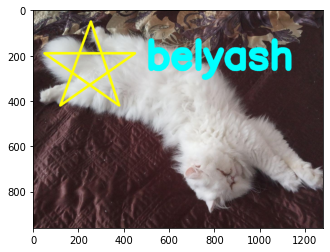

True

In [10]:
playing_belyash = belyash.copy();
pts = np.array([[50, 190], [380, 420], [255, 50], [120, 420], [450, 190]])
font = cv2.FONT_HERSHEY_SIMPLEX
polygon = cv2.polylines(playing_belyash,[pts],True,(0,255,255), thickness=10)
cv2.putText(playing_belyash, "belyash", (500, 255), font, 5.6, (255, 255, 0), 25)
print_img(polygon)
cv2.imwrite('/home/qwe/Desktop/анализ изображений/playing_belyash.jpg',playing_belyash)